# Carga del **DataSet e Instalaciones de Librerias**

---



In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Download latest version
path = kagglehub.dataset_download("rikdifos/credit-card-approval-prediction")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/credit-card-approval-prediction


In [ ]:
application_record = pd.read_csv('/kaggle/input/credit-card-approval-prediction/application_record.csv')
application_record.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
credit_record = pd.read_csv('/kaggle/input/credit-card-approval-prediction/credit_record.csv')
credit_record.head(5)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


# **Limpieza de los datos**

**application_record**

In [ ]:
#Validamos cuantas filas y columnas tienen las tablas
print(application_record.shape) #(438557, 18)
print(credit_record.shape) #(1048575, 3)

(438557, 18)
(1048575, 3)


In [ ]:
# Identificamos duplicados
application_record.duplicated(subset=['ID']).sum() #47 id duplicados

np.int64(47)

In [ ]:
#Creamos una tabla con los datos duplicados para guardarlos en caso de requerir utilizarlos mas adelante.
tabla_duplicados = application_record[application_record.duplicated(subset='ID', keep=False)]
tabla_duplicados = tabla_duplicados.sort_values(by='ID')
tabla_duplicados.head()

#valores duplicados estan errados puesto que un mismo ID posee valores diferentes como por ejemplo el sexo.

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
425023,7022197,F,N,Y,0,450000.0,Commercial associate,Higher education,Separated,House / apartment,-19813,-1799,1,0,0,1,NaN,1.0
426818,7022197,M,Y,Y,3,135000.0,Working,Secondary / secondary special,Married,House / apartment,-11945,-735,1,0,0,1,Laborers,5.0
431911,7022327,M,Y,Y,0,256500.0,Commercial associate,Higher education,Married,House / apartment,-21503,-1674,1,0,0,1,Core staff,2.0
431545,7022327,F,N,Y,0,135000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-14771,-5298,1,0,0,0,High skill tech staff,1.0
425486,7023108,M,Y,Y,1,67500.0,Working,Secondary / secondary special,Married,House / apartment,-15156,-1696,1,1,0,0,Core staff,3.0


In [ ]:
#Eliminamos duplicados
application_record.drop_duplicates(subset=['ID'], inplace=True)
print(application_record.shape) #(438510, 18) sin los valores duplicados

(438510, 18)


In [ ]:
application_record.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438510 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438510 non-null  int64  
 1   CODE_GENDER          438510 non-null  object 
 2   FLAG_OWN_CAR         438510 non-null  object 
 3   FLAG_OWN_REALTY      438510 non-null  object 
 4   CNT_CHILDREN         438510 non-null  int64  
 5   AMT_INCOME_TOTAL     438510 non-null  float64
 6   NAME_INCOME_TYPE     438510 non-null  object 
 7   NAME_EDUCATION_TYPE  438510 non-null  object 
 8   NAME_FAMILY_STATUS   438510 non-null  object 
 9   NAME_HOUSING_TYPE    438510 non-null  object 
 10  DAYS_BIRTH           438510 non-null  int64  
 11  DAYS_EMPLOYED        438510 non-null  int64  
 12  FLAG_MOBIL           438510 non-null  int64  
 13  FLAG_WORK_PHONE      438510 non-null  int64  
 14  FLAG_PHONE           438510 non-null  int64  
 15  FLAG_EMAIL           4

In [ ]:
#revisión de valores nulos
application_record.isnull().sum()

#Los valores nulos de Days_employed Y Years_employed indica que son ID desempleados

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [ ]:
print((application_record['OCCUPATION_TYPE'].isnull().sum() / application_record.shape[0]) * 100 ,'%') # el 31% de los valores de ocupation_type son nulos (ojo: revisar la razon)

30.602038722035985 %


In [ ]:
# #Como es un Porcentaje alto rellenamos los valores nulos con con la palabra Unknown
application_record['OCCUPATION_TYPE'] = application_record['OCCUPATION_TYPE'].fillna('Unknown')

In [ ]:
#No se puede tener 2.5 hijos por lo que cambiamos la columna de cantidad de family members a Int al igual que la de Amt_income_total
application_record['CNT_FAM_MEMBERS'] = application_record['CNT_FAM_MEMBERS'].astype(int)
application_record['AMT_INCOME_TOTAL'] = application_record['AMT_INCOME_TOTAL'].astype(int)

In [ ]:
#Creamos columnas para saber la edad y años de empleo de cada cliente

# Edad en años
application_record['DAYS_BIRTH'] = (-application_record['DAYS_BIRTH']) // 365

# Reemplazamos 365243 (desempleados) con NaN y calcular años empleados
application_record['DAYS_EMPLOYED'] = application_record['DAYS_EMPLOYED'].replace(365243, np.nan)
application_record['DAYS_EMPLOYED'] = (-application_record['DAYS_EMPLOYED']) // 365

In [ ]:
# #Convertimos estas columnas de manera binaria
application_record['CODE_GENDER'] = application_record['CODE_GENDER'].astype(str).map({'F': 1, 'M': 0})
application_record['FLAG_OWN_CAR'] = application_record['FLAG_OWN_CAR'].astype(str).map({'Y': 1, 'N': 0})
application_record['FLAG_OWN_REALTY'] = application_record['FLAG_OWN_REALTY'].astype(str).map({'Y': 1, 'N': 0})

In [ ]:
#convertimos estas variables cateogrias a numericas
!pip install category_encoders
import category_encoders as ce

# Lista de variables categóricas con orden logico
categorical_cols = ['NAME_EDUCATION_TYPE']
encoder = ce.OrdinalEncoder(cols=categorical_cols) #Codifacador ordinal
application_record = encoder.fit_transform(application_record) #aplicacion al dataframe

# Lista de variables que NO tienen orden lógico
onehot_cols = ['NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']
encoder = ce.OneHotEncoder(cols=onehot_cols)
application_record = encoder.fit_transform(application_record)

In [ ]:
application_record.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438510 entries, 0 to 438556
Data columns (total 49 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    438510 non-null  int64  
 1   CODE_GENDER           438510 non-null  int64  
 2   FLAG_OWN_CAR          438510 non-null  int64  
 3   FLAG_OWN_REALTY       438510 non-null  int64  
 4   CNT_CHILDREN          438510 non-null  int64  
 5   AMT_INCOME_TOTAL      438510 non-null  int64  
 6   NAME_INCOME_TYPE_1    438510 non-null  int64  
 7   NAME_INCOME_TYPE_2    438510 non-null  int64  
 8   NAME_INCOME_TYPE_3    438510 non-null  int64  
 9   NAME_INCOME_TYPE_4    438510 non-null  int64  
 10  NAME_INCOME_TYPE_5    438510 non-null  int64  
 11  NAME_EDUCATION_TYPE   438510 non-null  int64  
 12  NAME_FAMILY_STATUS_1  438510 non-null  int64  
 13  NAME_FAMILY_STATUS_2  438510 non-null  int64  
 14  NAME_FAMILY_STATUS_3  438510 non-null  int64  
 15  NAME_

**Credit_Record**

In [ ]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [ ]:
credit_record.duplicated(subset=['STATUS']).sum() #esta columna posee duplicados porque es un historial de credito de los clientes

np.int64(1048567)

0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

In [ ]:
# Revisamos valores únicos en STATUS
print("Valores únicos en STATUS:")
print(credit_record['STATUS'].value_counts())
#la mayoría son clientes sin atraso grave (C, 0, X), y algunos sí tienen distintos niveles de atraso (1 a 5).

Valores únicos en STATUS:
STATUS
C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: count, dtype: int64


In [ ]:
# credit_record['STATUS'] = credit_record['STATUS'].astype('category')

In [ ]:
print(credit_record['MONTHS_BALANCE'].describe())

#El dataset cubre información crediticia de hasta 5 años atrás.
#La mayoría de los registros se concentran en los últimos 1 a 2 años.

count    1.048575e+06
mean    -1.913700e+01
std      1.402350e+01
min     -6.000000e+01
25%     -2.900000e+01
50%     -1.700000e+01
75%     -7.000000e+00
max      0.000000e+00
Name: MONTHS_BALANCE, dtype: float64


In [ ]:
credit_record.isnull().sum()

,0
ID,0
MONTHS_BALANCE,0
STATUS,0


In [ ]:
#identificamos clientes morosos:  1 = cliente moroso. 0 = cliente sin morosidad imporortante.
credit_record['STATUS'] = credit_record['STATUS'].replace({'C': '0', 'X': '0'})
credit_record['STATUS'] = credit_record['STATUS'].astype('int')
credit_record['STATUS'] = credit_record['STATUS'].apply(lambda x:1 if x >= 2 else 0)

In [ ]:
#Agrupamos por cliente (ID) tomando máximo, para saber si alguna vez fue moroso
credit_record = credit_record.groupby('ID').agg(max).reset_index()
credit_record.drop('MONTHS_BALANCE', axis=1, inplace=True)

/tmp/ipython-input-359-1128312967.py:2: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  credit_record = credit_record.groupby('ID').agg(max).reset_index()


In [ ]:
credit_record['STATUS'].value_counts(normalize=True)

,proportion
STATUS,
0,0.985495
1,0.014505


In [ ]:
Credit_Card_Approval = pd.merge(application_record, credit_record, on='ID', how='inner')
Credit_Card_Approval.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE_1,NAME_INCOME_TYPE_2,NAME_INCOME_TYPE_3,NAME_INCOME_TYPE_4,...,OCCUPATION_TYPE_12,OCCUPATION_TYPE_13,OCCUPATION_TYPE_14,OCCUPATION_TYPE_15,OCCUPATION_TYPE_16,OCCUPATION_TYPE_17,OCCUPATION_TYPE_18,OCCUPATION_TYPE_19,CNT_FAM_MEMBERS,STATUS
0,5008804,0,1,1,0,427500,1,0,0,0,...,0,0,0,0,0,0,0,0,2,0
1,5008805,0,1,1,0,427500,1,0,0,0,...,0,0,0,0,0,0,0,0,2,0
2,5008806,0,1,1,0,112500,1,0,0,0,...,0,0,0,0,0,0,0,0,2,0
3,5008808,1,0,1,0,270000,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5008809,1,0,1,0,270000,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


# **Analisis Explotario**

In [ ]:
Credit_Card_Approval.describe()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE_1,NAME_INCOME_TYPE_2,NAME_INCOME_TYPE_3,NAME_INCOME_TYPE_4,...,OCCUPATION_TYPE_12,OCCUPATION_TYPE_13,OCCUPATION_TYPE_14,OCCUPATION_TYPE_15,OCCUPATION_TYPE_16,OCCUPATION_TYPE_17,OCCUPATION_TYPE_18,OCCUPATION_TYPE_19,CNT_FAM_MEMBERS,STATUS
count,3.645700e+04,36457.000000,36457.000000,36457.000000,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.000000,36457.000000,...,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,0.670105,0.379708,0.672189,0.430315,1.866857e+05,0.516197,0.232877,0.168747,0.081877,...,0.017966,0.004800,0.033107,0.004142,0.004773,0.002332,0.002167,0.001646,2.198453,0.016897
std,4.187524e+04,0.470181,0.485321,0.469422,0.742367,1.017892e+05,0.499744,0.422670,0.374533,0.274181,...,0.132831,0.069118,0.178920,0.064225,0.068921,0.048230,0.046501,0.040535,0.911686,0.128886
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,2.700000e+04,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.042028e+06,0.000000,0.000000,0.000000,0.000000,1.215000e+05,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.074614e+06,1.000000,0.000000,1.000000,0.000000,1.575000e+05,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115396e+06,1.000000,1.000000,1.000000,1.000000,2.250000e+05,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
max,5.150487e+06,1.000000,1.000000,1.000000,19.000000,1.575000e+06,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,1.000000


In [ ]:
#Revisamos y limpiamos valores anómalos en CNT_CHILDREN ya que vemos que dice que el numero mayor de hijos es 19
print("Distribución original CNT_CHILDREN:")
print(Credit_Card_Approval['CNT_CHILDREN'].value_counts().sort_index())

# Limitamos el número de hijos a un máximo razonable:
Credit_Card_Approval.loc[Credit_Card_Approval['CNT_CHILDREN'] > 5 , 'CNT_CHILDREN'] = 5

Distribución original CNT_CHILDREN:
CNT_CHILDREN
0     25201
1      7492
2      3256
3       419
4        63
5        20
7         2
14        3
19        1
Name: count, dtype: int64


In [ ]:
#Revisamos y limpiamos valores anómalos en CNT_FAM_Members ya que vemos outliers a partir de 7 miembros
print("Distribución original CNT_FAM_MEMBERS:")
print(Credit_Card_Approval['CNT_FAM_MEMBERS'].value_counts().sort_index())

# Limitamos el número de hijos a un máximo razonable:
Credit_Card_Approval.loc[Credit_Card_Approval['CNT_FAM_MEMBERS'] > 7, 'CNT_FAM_MEMBERS'] = 7

Distribución original CNT_FAM_MEMBERS:
CNT_FAM_MEMBERS
1      6987
2     19463
3      6421
4      3106
5       397
6        58
7        19
9         2
15        3
20        1
Name: count, dtype: int64


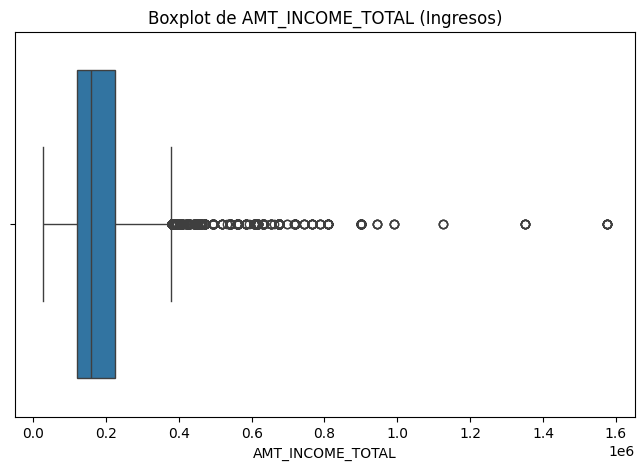

In [ ]:
# Revisar ingresos extremos
plt.figure(figsize=(8, 5))
sns.boxplot(x=Credit_Card_Approval['AMT_INCOME_TOTAL'])
plt.title("Boxplot de AMT_INCOME_TOTAL (Ingresos)")
plt.show()

#Observaciones:
# muestra que hay muchos valores atípicos (outliers) en los ingresos ya que tiene una distribución altamente sesgada a la derecha (valores extremos altos).
# La mayoría de los datos están agrupados en valores bajos, mientras que hay algunos puntos extremos que llegan hasta casi 7 millones.

In [ ]:
Credit_Card_Approval = Credit_Card_Approval[Credit_Card_Approval['AMT_INCOME_TOTAL'] < Credit_Card_Approval['AMT_INCOME_TOTAL'].quantile(0.99)]
print(f"Filas restantes después de eliminar outliers: {len(Credit_Card_Approval)}")

Filas restantes después de eliminar outliers: 36082


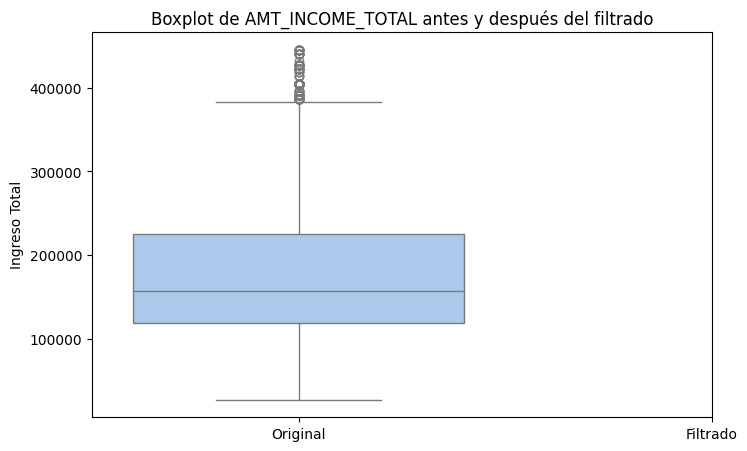

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=[df_original['AMT_INCOME_TOTAL'], df_filtrado['AMT_INCOME_TOTAL']], palette='pastel')
plt.xticks([0, 1], ['Original', 'Filtrado'])
plt.title('Boxplot de AMT_INCOME_TOTAL antes y después del filtrado')
plt.ylabel('Ingreso Total')
plt.show()

COLINEALIDAD

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

In [ ]:
# Paso 1: Crear copia limpia del DataFrame sin columnas objetivo o ID
X = Credit_Card_Approval.drop(columns=['ID', 'STATUS']).copy()

# Paso 2: Eliminar o imputar valores problemáticos
X = X.replace([np.inf, -np.inf], np.nan)               # Reemplazar inf por NaN
X = X.fillna(X.mean(numeric_only=True))                # Imputar todos los NaNs con la media

# Paso 3: Comprobación definitiva
print("¿Quedan NaNs?", X.isnull().values.any())
print("¿Quedan Infinitos?", np.isinf(X.values).any())

# Paso 4: Asegurarse que todo es tipo float (VIF necesita floats, no ints)
X = X.astype(float)

¿Quedan NaNs? False
¿Quedan Infinitos? False


In [ ]:
# Filtrar solo variables numéricas predictoras (excluyendo ID y STATUS)
data = Credit_Card_Approval.drop(columns=['ID', 'STATUS'])

# Matriz de correlación
correlation_matrix = data.corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
print(correlation_matrix)

Matriz de correlación:
                      CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
CODE_GENDER              1.000000     -0.363487         0.052201   
FLAG_OWN_CAR            -0.363487      1.000000        -0.014265   
FLAG_OWN_REALTY          0.052201     -0.014265         1.000000   
CNT_CHILDREN            -0.076216      0.107165        -0.003779   
AMT_INCOME_TOTAL        -0.220282      0.230258         0.022038   
NAME_INCOME_TYPE_1      -0.138720      0.082943        -0.050128   
NAME_INCOME_TYPE_2      -0.019140      0.052088        -0.010139   
NAME_INCOME_TYPE_3       0.173968     -0.156941         0.094211   
NAME_INCOME_TYPE_4       0.043462     -0.015374        -0.022783   
NAME_INCOME_TYPE_5       0.008835     -0.013605         0.008858   
NAME_EDUCATION_TYPE     -0.015964     -0.073012        -0.001991   
NAME_FAMILY_STATUS_1     0.021676     -0.028735        -0.021935   
NAME_FAMILY_STATUS_2    -0.104232      0.148817         0.002058   
NAME_FAMILY_STATUS_3     

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


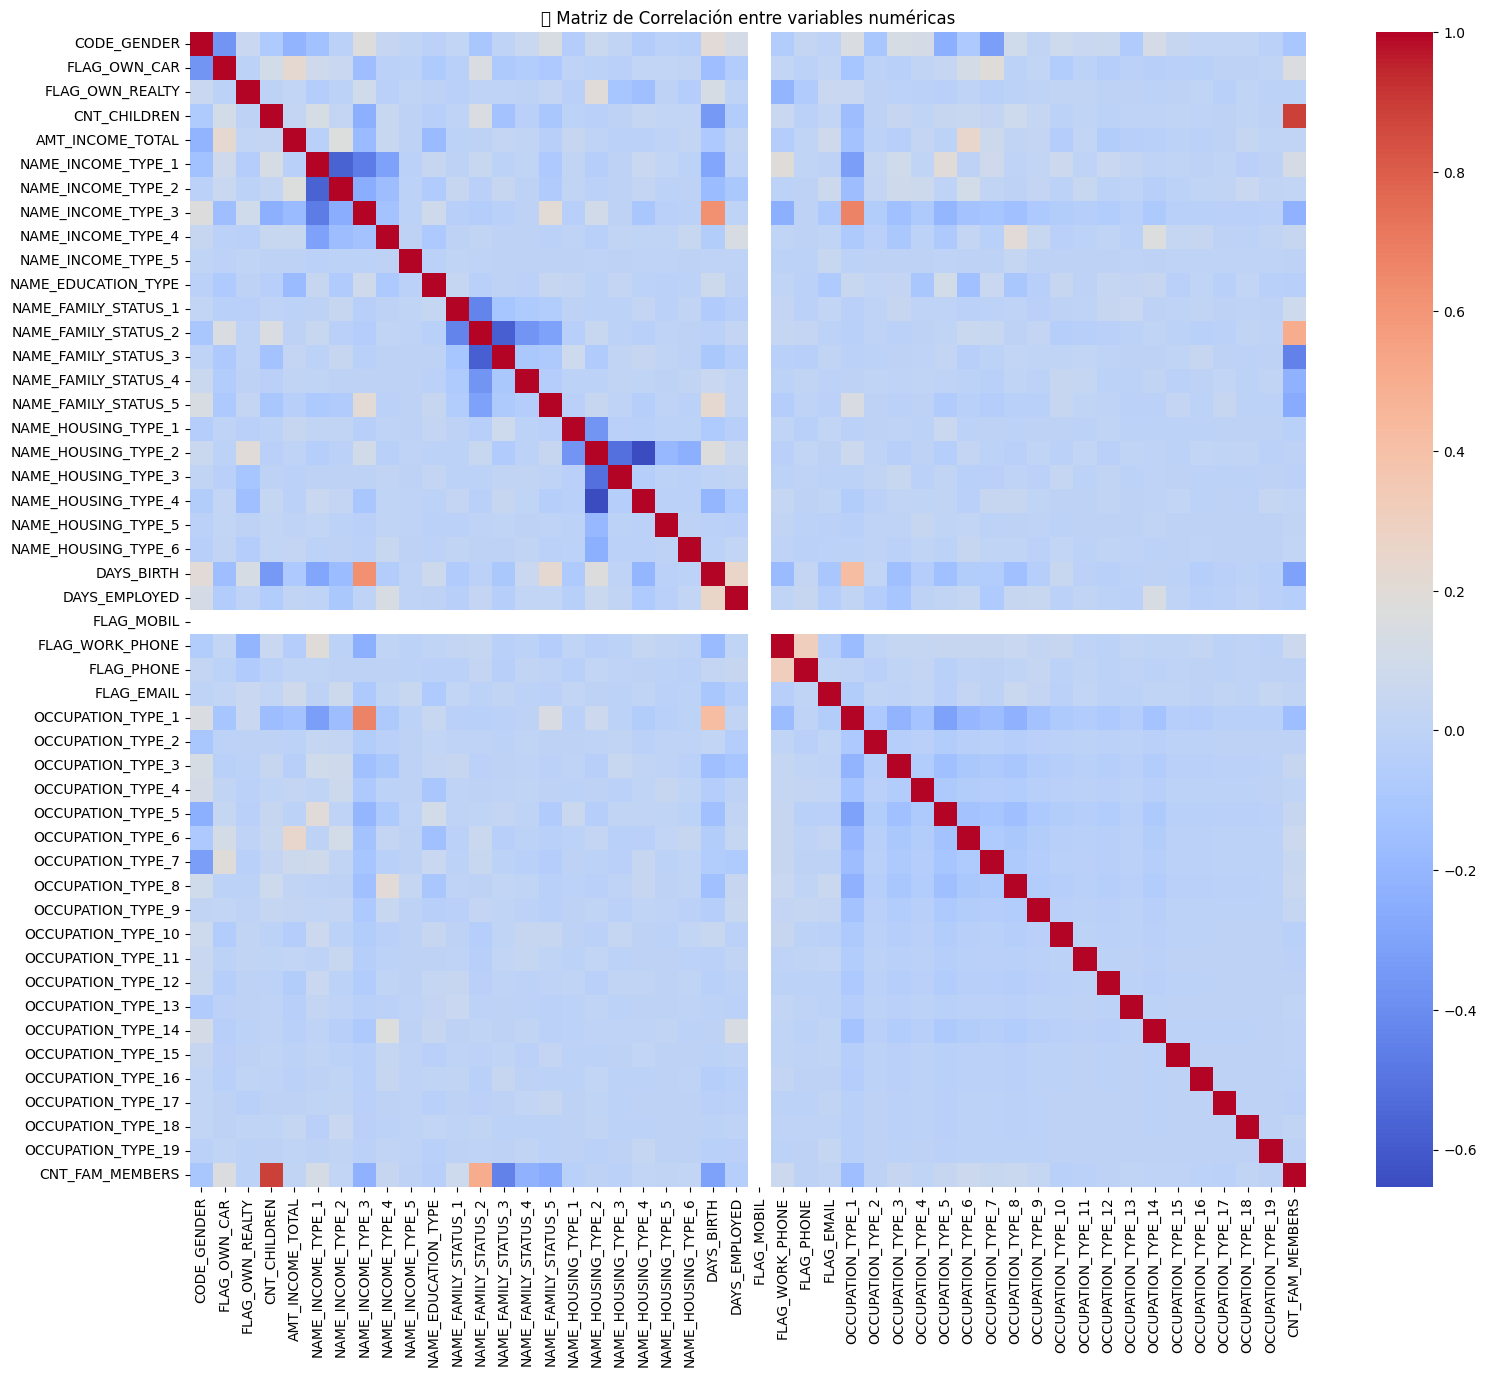

In [ ]:
plt.figure(figsize=(18, 15))
sns.heatmap(X.corr(), cmap='coolwarm', annot=False)
plt.title("🔍 Matriz de Correlación entre variables numéricas")
plt.show()

In [ ]:
# Paso 5: Calcular VIF
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostrar resultados
print("\n Factores de inflación de la varianza (VIF):")
print(vif.sort_values(by="VIF", ascending=False))

#hay muchos inf es decir tiene colinealidad

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss



 Factores de inflación de la varianza (VIF):
                Variable         VIF
6     NAME_INCOME_TYPE_2         inf
7     NAME_INCOME_TYPE_3         inf
5     NAME_INCOME_TYPE_1         inf
14  NAME_FAMILY_STATUS_4         inf
12  NAME_FAMILY_STATUS_2         inf
11  NAME_FAMILY_STATUS_1         inf
9     NAME_INCOME_TYPE_5         inf
8     NAME_INCOME_TYPE_4         inf
15  NAME_FAMILY_STATUS_5         inf
13  NAME_FAMILY_STATUS_3         inf
21   NAME_HOUSING_TYPE_6         inf
20   NAME_HOUSING_TYPE_5         inf
19   NAME_HOUSING_TYPE_4         inf
18   NAME_HOUSING_TYPE_3         inf
17   NAME_HOUSING_TYPE_2         inf
16   NAME_HOUSING_TYPE_1         inf
40    OCCUPATION_TYPE_13         inf
41    OCCUPATION_TYPE_14         inf
42    OCCUPATION_TYPE_15         inf
43    OCCUPATION_TYPE_16         inf
44    OCCUPATION_TYPE_17         inf
45    OCCUPATION_TYPE_18         inf
30     OCCUPATION_TYPE_3         inf
31     OCCUPATION_TYPE_4         inf
29     OCCUPATION_TYPE_2     

/tmp/ipython-input-373-3798317918.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="VIF", y="Variable", data=vif_filtered, palette="coolwarm")


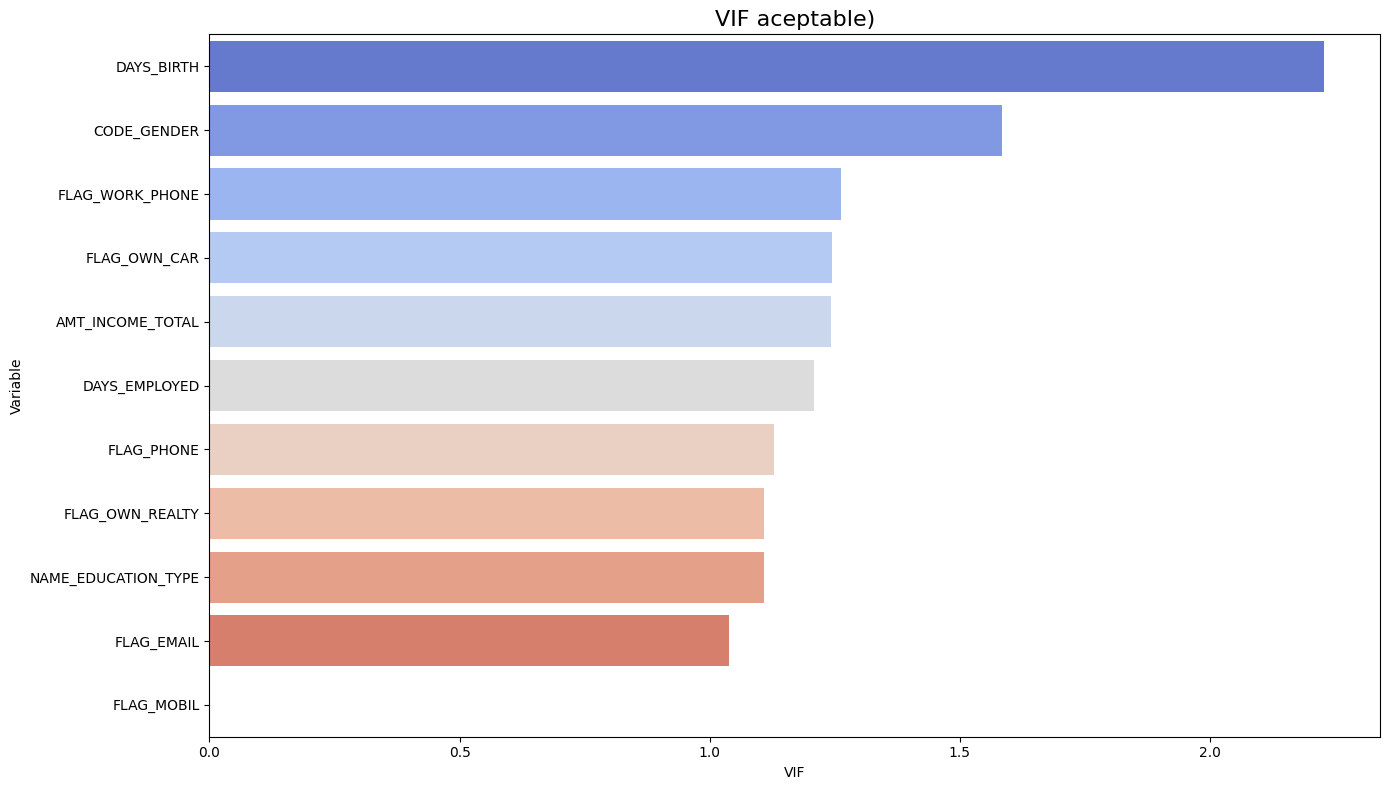

In [ ]:
# Ordenar VIFs
vif_sorted = vif.sort_values(by="VIF", ascending=False)

# Limitar a VIF < 50 para una visualización más limpia
vif_filtered = vif_sorted[vif_sorted["VIF"] < 50]

# Gráfico
plt.figure(figsize=(14, 8))
sns.barplot(x="VIF", y="Variable", data=vif_filtered, palette="coolwarm")
plt.title("VIF aceptable)", fontsize=16)
plt.xlabel("VIF")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

In [ ]:
# Análisis de componentes principales (PCA)
pca = PCA()
pca.fit(X)

# Obtener las varianzas explicadas por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_

# Mostrar las varianzas explicadas por cada componente principal
print("\n Varianza explicada por cada componente principal (PCA):")
print(explained_variance_ratio)


 Varianza explicada por cada componente principal (PCA):
[9.99999976e-01 1.90941264e-08 4.47373788e-09 1.68628456e-10
 5.39546147e-11 4.38686541e-11 4.16904262e-11 3.80565980e-11
 3.44641612e-11 3.26712872e-11 2.88846829e-11 2.28796932e-11
 1.76135669e-11 1.72226374e-11 1.59983010e-11 1.52473609e-11
 1.50539268e-11 1.18114016e-11 1.09073117e-11 1.07123612e-11
 1.03370703e-11 8.86368867e-12 7.46183099e-12 6.25953226e-12
 5.74854864e-12 5.22633681e-12 4.82185780e-12 4.44971042e-12
 2.81586969e-12 2.70168814e-12 2.32479113e-12 2.14327661e-12
 1.41586355e-12 1.19367473e-12 7.83987411e-13 6.99687757e-13
 6.72957020e-13 6.03682764e-13 3.44234538e-13 3.09991358e-13
 2.41661224e-13 8.14119150e-14 5.34685297e-14 1.66742898e-25
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]


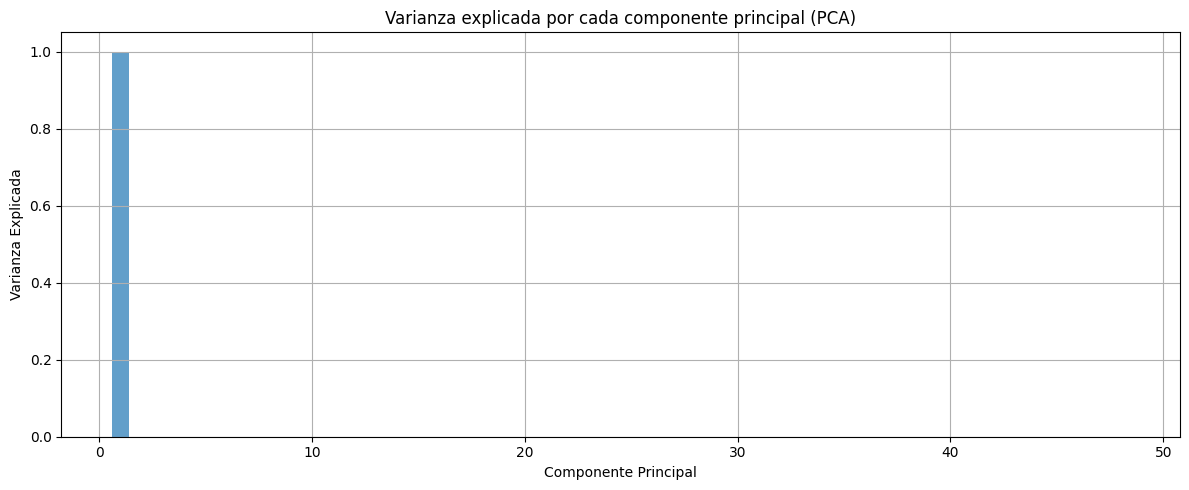

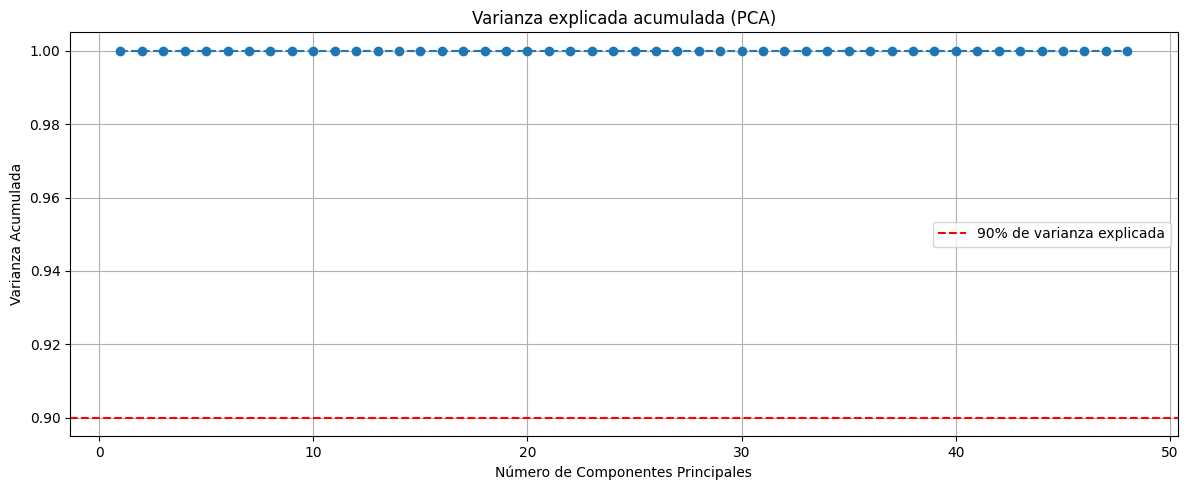

In [ ]:
# Ya tienes esto:
# pca = PCA()
# pca.fit(X)
explained_variance_ratio = pca.explained_variance_ratio_

# Varianza acumulada
cumulative_variance = np.cumsum(explained_variance_ratio)

# Gráfico de barras: varianza explicada individual
plt.figure(figsize=(12, 5))
plt.bar(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, alpha=0.7, align='center')
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Varianza explicada por cada componente principal (PCA)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico de línea: varianza explicada acumulada
plt.figure(figsize=(12, 5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.title('Varianza explicada acumulada (PCA)')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% de varianza explicada')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Correccion

In [ ]:
# Lista de columnas dummy redundantes a eliminar (una por grupo)
columnas_a_eliminar = [
    'NAME_INCOME_TYPE_1',
    'NAME_FAMILY_STATUS_1',
    'NAME_HOUSING_TYPE_1',
    'OCCUPATION_TYPE_1'
]

# Eliminar columnas del conjunto de predictores
X_reducido = X.drop(columns=columnas_a_eliminar)

In [ ]:
# Asegurarse de no tener valores nulos o infinitos
X_reducido = X_reducido.replace([np.inf, -np.inf], np.nan)
X_reducido = X_reducido.dropna()

# Recalcular VIF
vif = pd.DataFrame()
vif["Variable"] = X_reducido.columns
vif["VIF"] = [variance_inflation_factor(X_reducido.values, i) for i in range(X_reducido.shape[1])]

# Mostrar resultados
print("\n VIF después de eliminar colinealidad:")
print(vif.sort_values(by="VIF", ascending=False))


 VIF después de eliminar colinealidad:
                Variable          VIF
21            FLAG_MOBIL  2282.402256
43       CNT_FAM_MEMBERS   437.860650
3           CNT_CHILDREN   286.773865
11  NAME_FAMILY_STATUS_3    63.606716
12  NAME_FAMILY_STATUS_4    30.809120
13  NAME_FAMILY_STATUS_5    23.433347
14   NAME_HOUSING_TYPE_2     6.266452
16   NAME_HOUSING_TYPE_4     3.933524
10  NAME_FAMILY_STATUS_2     3.033324
15   NAME_HOUSING_TYPE_3     2.904997
6     NAME_INCOME_TYPE_3     2.779320
19            DAYS_BIRTH     2.228128
28     OCCUPATION_TYPE_5     1.933229
0            CODE_GENDER     1.584479
31     OCCUPATION_TYPE_8     1.579566
26     OCCUPATION_TYPE_3     1.570478
29     OCCUPATION_TYPE_6     1.516485
30     OCCUPATION_TYPE_7     1.484581
18   NAME_HOUSING_TYPE_6     1.452726
17   NAME_HOUSING_TYPE_5     1.286782
22       FLAG_WORK_PHONE     1.262057
37    OCCUPATION_TYPE_14     1.249856
1           FLAG_OWN_CAR     1.244632
4       AMT_INCOME_TOTAL     1.241322
27     OCC

/tmp/ipython-input-378-1003792305.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="VIF", y="Variable", data=vif_sorted, palette="coolwarm")


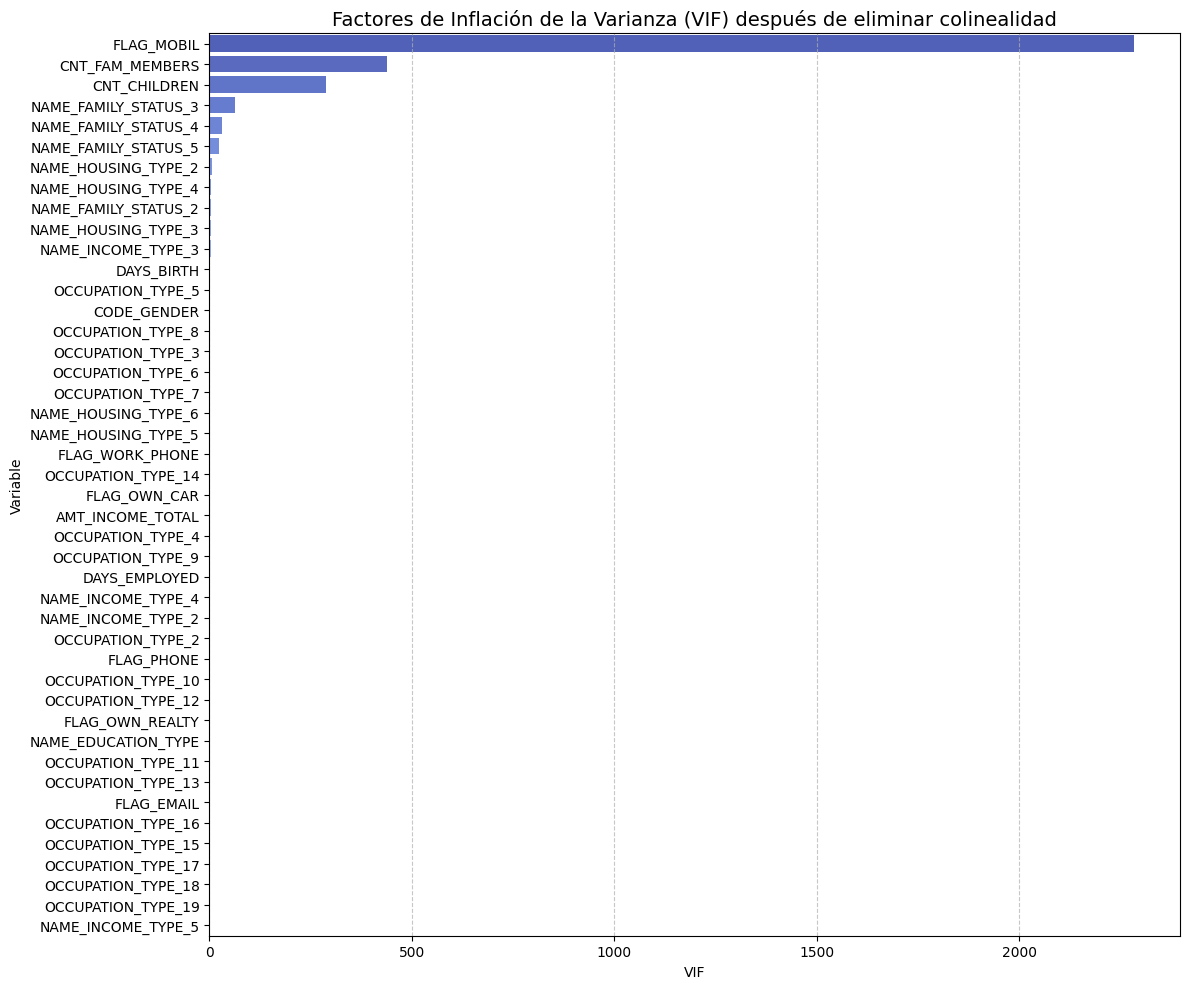

In [ ]:
# Ordenar VIFs de mayor a menor
vif_sorted = vif.sort_values(by="VIF", ascending=False)

# Opcional: Filtrar VIFs exageradamente altos para claridad (por ejemplo, FLAG_MOBIL)
# vif_sorted = vif_sorted[vif_sorted["VIF"] < 1000]

# Crear el gráfico
plt.figure(figsize=(12, 10))
sns.barplot(x="VIF", y="Variable", data=vif_sorted, palette="coolwarm")
plt.title("Factores de Inflación de la Varianza (VIF) después de eliminar colinealidad", fontsize=14)
plt.xlabel("VIF")
plt.ylabel("Variable")
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
#Reducir dimencionalidad
from sklearn.preprocessing import StandardScaler

# Estandarizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA (puedes definir cuántos componentes quieres)
pca = PCA(n_components=0.95)  # Mantener 95% de la varianza
X_pca = pca.fit_transform(X_scaled)

print(f"Número de componentes seleccionados: {pca.n_components_}")

Número de componentes seleccionados: 38


# Modelo Predictivo

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier


In [ ]:
#Separacion Variables:
X = Credit_Card_Approval.drop(columns=['ID', 'STATUS'])
y = Credit_Card_Approval['STATUS']

# #Divicion del conjunto de datos en entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

Balanceo de Clases

In [ ]:
# Ver el desbalanceo original
print("Distribución original:", Counter(y))

# Aplicar Oversampling (duplicamos muestras de la clase minoritaria)
oversample = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_over, y_over = oversample.fit_resample(X, y)

# Ver nueva distribución
print("Después del oversampling:", Counter(y_over))


Distribución original: Counter({0: 35471, 1: 611})
Después del oversampling: Counter({0: 35471, 1: 35471})


In [ ]:
# Aplicar Undersampling (reducimos la clase mayoritaria)
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_under, y_under = undersample.fit_resample(X, y)

# Ver nueva distribución
print("Después del undersampling:", Counter(y_under))

Después del undersampling: Counter({0: 611, 1: 611})




```
Regresión logística con PCA
```



In [ ]:
#oversampling sobre X_pca e y

# Imputar valores faltantes antes de todo
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Oversampling
ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_imputed, y)
print("Distribución después del Oversampling:", Counter(y_resampled))

# Escalado
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

# PCA
pca = PCA(n_components=38, random_state=42)
X_pca_resampled = pca.fit_transform(X_resampled_scaled)

# Split en train y test
X_train, X_test, y_train, y_test = train_test_split(X_pca_resampled, y_resampled, test_size=0.3, random_state=42)

# Entrenamiento
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Evaluación
y_pred = logreg.predict(X_test)
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred))

Distribución después del Oversampling: Counter({0: 35471, 1: 35471})
Matriz de confusión:
[[6450 4163]
 [4780 5890]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.57      0.61      0.59     10613
           1       0.59      0.55      0.57     10670

    accuracy                           0.58     21283
   macro avg       0.58      0.58      0.58     21283
weighted avg       0.58      0.58      0.58     21283

              precision    recall  f1-score   support

           0       0.57      0.61      0.59     10613
           1       0.59      0.55      0.57     10670

    accuracy                           0.58     21283
   macro avg       0.58      0.58      0.58     21283
weighted avg       0.58      0.58      0.58     21283



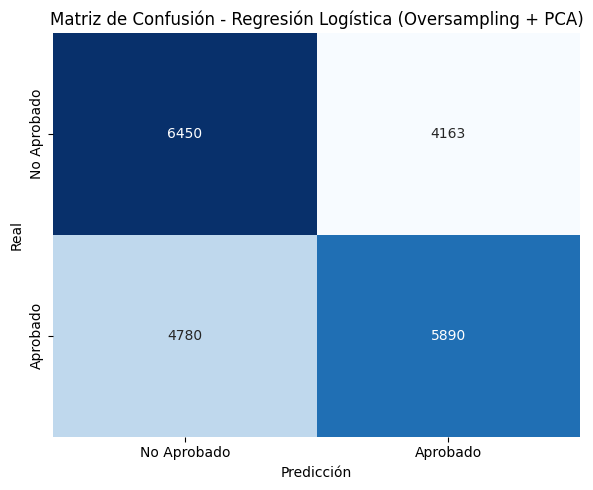

In [ ]:
# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Aprobado', 'Aprobado'],
            yticklabels=['No Aprobado', 'Aprobado'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Regresión Logística (Oversampling + PCA)')
plt.tight_layout()
plt.show()

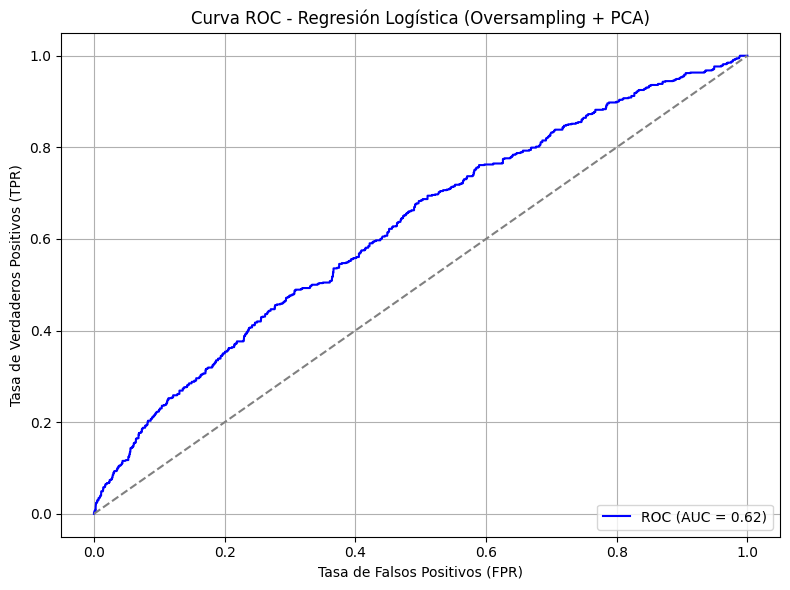

In [ ]:
# Obtener probabilidades de clase positiva
y_prob = logreg.predict_proba(X_test)[:, 1]

# Calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Regresión Logística (Oversampling + PCA)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Undersampling
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_under, y_under = undersample.fit_resample(X, y)
print("Distribución después del Undersampling:", Counter(y_under))

# Imputación de valores faltantes
imputer = SimpleImputer(strategy='mean')
X_under_imputed = imputer.fit_transform(X_under)

# Escalado
scaler = StandardScaler()
X_under_scaled = scaler.fit_transform(X_under_imputed)

# PCA
pca = PCA(n_components=38, random_state=42)
X_pca_under = pca.fit_transform(X_under_scaled)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_pca_under, y_under, test_size=0.3, random_state=42)

# Entrenamiento y evaluación
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Evaluación
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Distribución después del Undersampling: Counter({0: 611, 1: 611})
Matriz de confusión:
[[ 91 105]
 [ 70 101]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.57      0.46      0.51       196
           1       0.49      0.59      0.54       171

    accuracy                           0.52       367
   macro avg       0.53      0.53      0.52       367
weighted avg       0.53      0.52      0.52       367



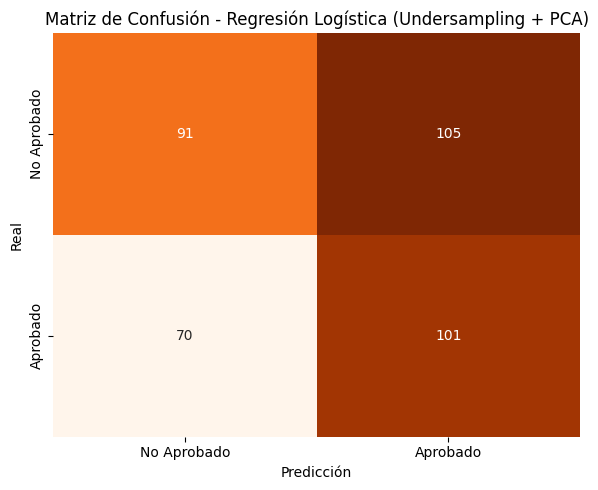

In [ ]:
# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['No Aprobado', 'Aprobado'],
            yticklabels=['No Aprobado', 'Aprobado'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Regresión Logística (Undersampling + PCA)')
plt.tight_layout()
plt.show()

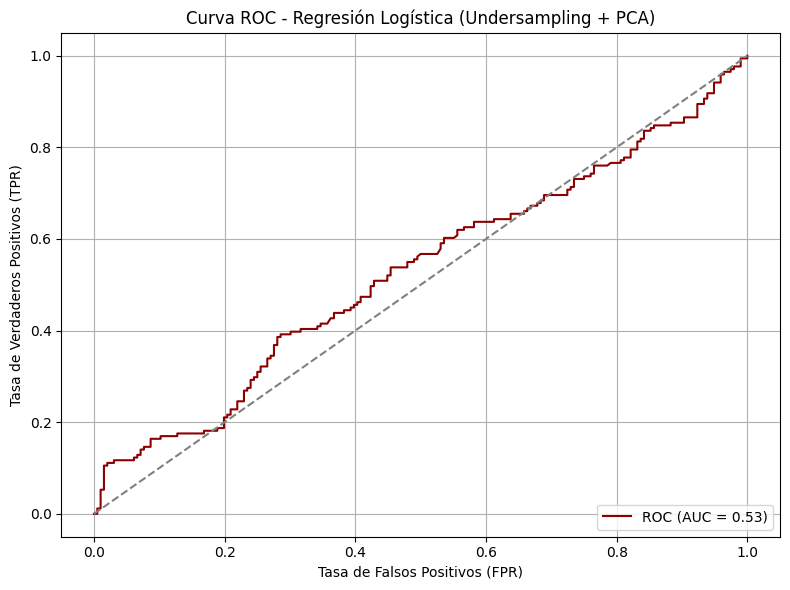

In [ ]:
# Predecir probabilidades de la clase positiva
y_prob = logreg.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkred', label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Regresión Logística (Undersampling + PCA)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

RANDOM FOREST con Oversampling

In [ ]:
#Datos
X = Credit_Card_Approval.drop(columns=['ID', 'STATUS'])
y = Credit_Card_Approval['STATUS']

# Oversampling
oversample = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_over, y_over = oversample.fit_resample(X, y)

# Split
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.2, random_state=42)


print("Después del oversampling:", Counter(y_over))
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_over, y_train_over)
y_pred_rf = rf.predict(X_test_over)

# Evaluación
print("Random Forest con Oversampling:")
print(confusion_matrix(y_test_over, y_pred_rf))
print(classification_report(y_test_over, y_pred_rf))

Después del oversampling: Counter({0: 35471, 1: 35471})
Random Forest con Oversampling:
[[6820  246]
 [   0 7123]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      7066
           1       0.97      1.00      0.98      7123

    accuracy                           0.98     14189
   macro avg       0.98      0.98      0.98     14189
weighted avg       0.98      0.98      0.98     14189



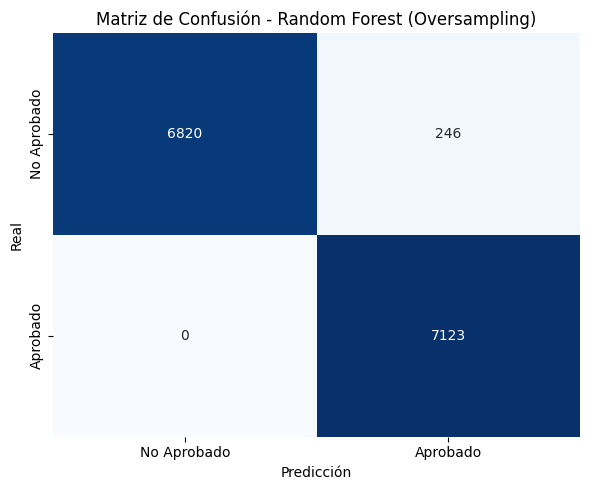

In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_test_over, y_pred_rf)

# Visualización
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Aprobado', 'Aprobado'],
            yticklabels=['No Aprobado', 'Aprobado'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest (Oversampling)')
plt.tight_layout()
plt.show()

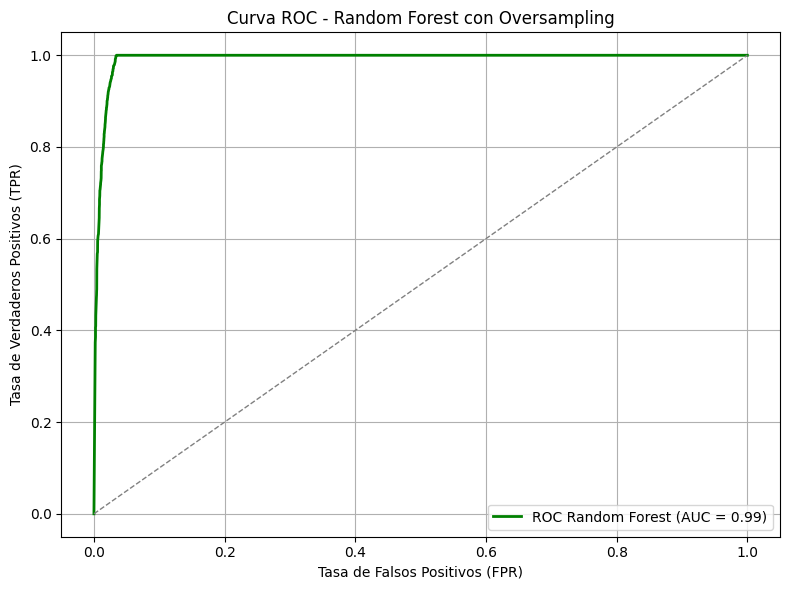

In [ ]:
# Probabilidades para la clase positiva
y_prob_rf = rf.predict_proba(X_test_over)[:, 1]

# Calcular puntos de la curva ROC
fpr, tpr, thresholds = roc_curve(y_test_over, y_prob_rf)
roc_auc = auc(fpr, tpr)

# Gráfica ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Random Forest con Oversampling')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

XGBOOST con Undersampling

In [ ]:
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler

# Undersampling
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_under, y_under = undersample.fit_resample(X, y)

print("Después del undersampling:", Counter(y_under))

# Split
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_under, y_train_under)
y_pred_xgb = xgb.predict(X_test_under)

# Evaluación
print("XGBoost con Undersampling:")
print(confusion_matrix(y_test_under, y_pred_xgb))
print(classification_report(y_test_under, y_pred_xgb))

Después del undersampling: Counter({0: 611, 1: 611})
XGBoost con Undersampling:
[[79 47]
 [27 92]]
              precision    recall  f1-score   support

           0       0.75      0.63      0.68       126
           1       0.66      0.77      0.71       119

    accuracy                           0.70       245
   macro avg       0.70      0.70      0.70       245
weighted avg       0.70      0.70      0.70       245



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [01:50:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


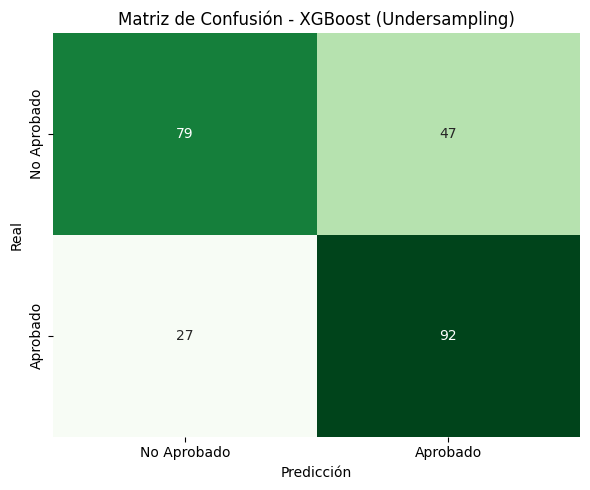

In [ ]:
# Calcular matriz de confusión
cm = confusion_matrix(y_test_under, y_pred_xgb)

# Graficar
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['No Aprobado', 'Aprobado'],
            yticklabels=['No Aprobado', 'Aprobado'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - XGBoost (Undersampling)')
plt.tight_layout()
plt.show()


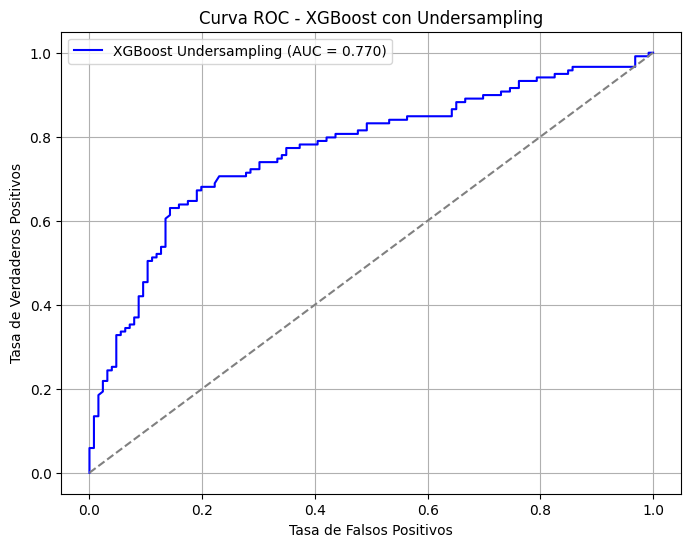

In [ ]:
# Probabilidades de clase positiva
from sklearn.metrics import roc_curve, roc_auc_score
y_prob_under = xgb.predict_proba(X_test_under)[:, 1]

# ROC
fpr, tpr, _ = roc_curve(y_test_under, y_prob_under)
roc_auc = roc_auc_score(y_test_under, y_prob_under)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'XGBoost Undersampling (AUC = {roc_auc:.3f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - XGBoost con Undersampling')
plt.legend()
plt.grid()
plt.show()

XGBoost con Oversampling

In [ ]:
# Oversampling
oversample = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_over, y_over = oversample.fit_resample(X, y)
print("Distribución después del Oversampling:", Counter(y_over))

#  Split en train y test
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, stratify=y_over, random_state=42)

# Entrenar XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Predicciones
y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:, 1]

# Evaluación
print(" Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\n Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Distribución después del Oversampling: Counter({0: 35471, 1: 35471})


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [01:50:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Matriz de confusión:
[[6654  441]
 [  58 7036]]

 Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      7095
           1       0.94      0.99      0.97      7094

    accuracy                           0.96     14189
   macro avg       0.97      0.96      0.96     14189
weighted avg       0.97      0.96      0.96     14189



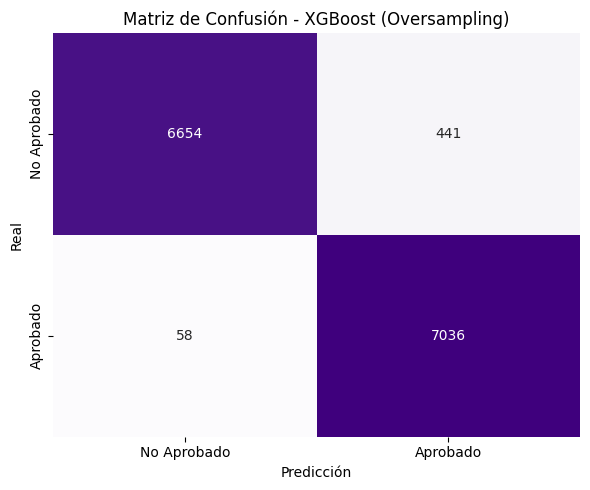

Reporte de clasificación:

              precision    recall  f1-score   support

 No Aprobado       0.99      0.94      0.96      7095
    Aprobado       0.94      0.99      0.97      7094

    accuracy                           0.96     14189
   macro avg       0.97      0.96      0.96     14189
weighted avg       0.97      0.96      0.96     14189



In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Gráfico
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False,
            xticklabels=['No Aprobado', 'Aprobado'],
            yticklabels=['No Aprobado', 'Aprobado'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - XGBoost (Oversampling)')
plt.tight_layout()
plt.show()

# Reporte de clasificación
print("Reporte de clasificación:\n")
print(classification_report(y_test, y_pred, target_names=['No Aprobado', 'Aprobado']))

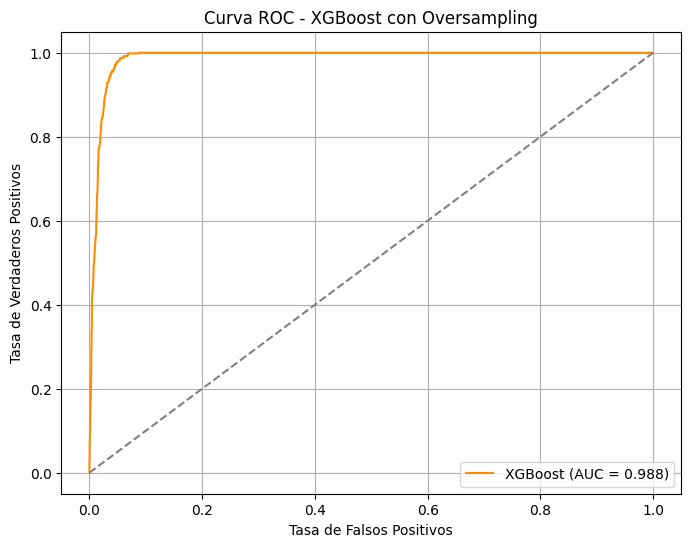

In [ ]:
#Curva ROC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probabilidades de clase positiva
y_prob = xgb.predict_proba(X_test)[:, 1]

# ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Gráfica
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.3f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - XGBoost con Oversampling')
plt.legend()
plt.grid()
plt.show()

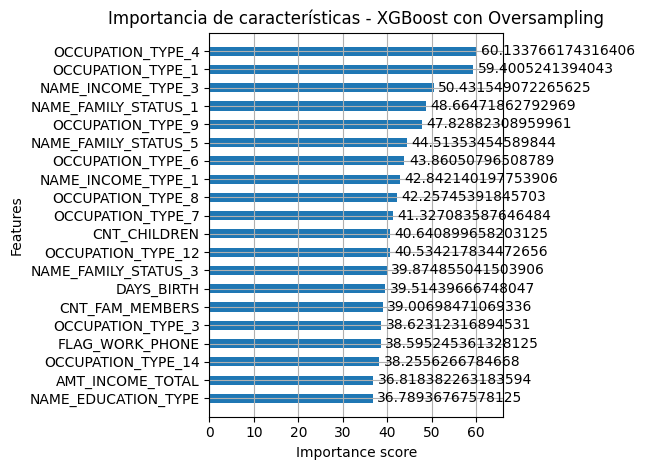

In [ ]:
from xgboost import plot_importance
plot_importance(xgb,
                max_num_features=20,
                importance_type='gain',
                height=0.5)

plt.title('Importancia de características - XGBoost con Oversampling')
plt.tight_layout()
plt.show()

Guardar Modelo

In [ ]:
import joblib
joblib.dump(xgb, 'modelo_xgboost_oversampling.pkl')

['modelo_xgboost_oversampling.pkl']

In [ ]:
modelo = joblib.load('modelo_xgboost_oversampling.pkl')

# Graficos Extras

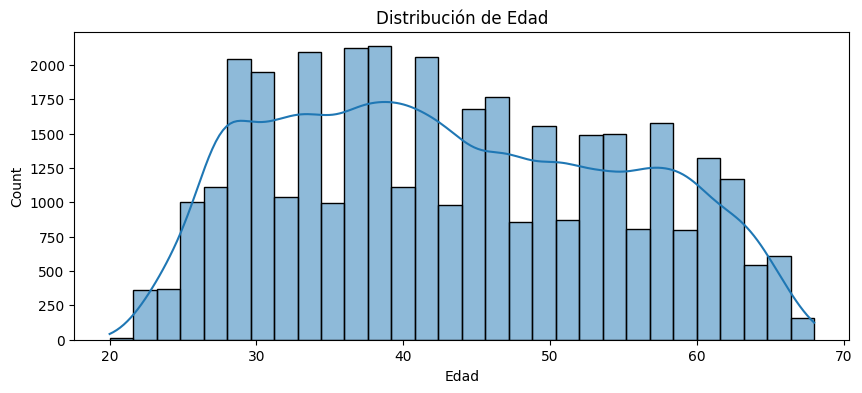

In [ ]:
# Revisamos edades (AGE)
plt.figure(figsize=(10,4))
sns.histplot(Credit_Card_Approval['DAYS_BIRTH'], bins=30, kde=True)
plt.title("Distribución de Edad")
plt.xlabel("Edad")
plt.show()

#Observaciones:

# 1. En la muestra consta de clientes entre los 20 y 70 años
# 2. Se puede observar que la mayoria de clientes pertenecen a un rango de edad de 30 a 50 años.
# 3. Hay más personas jóvenes que mayores, pero sin ser extremo.

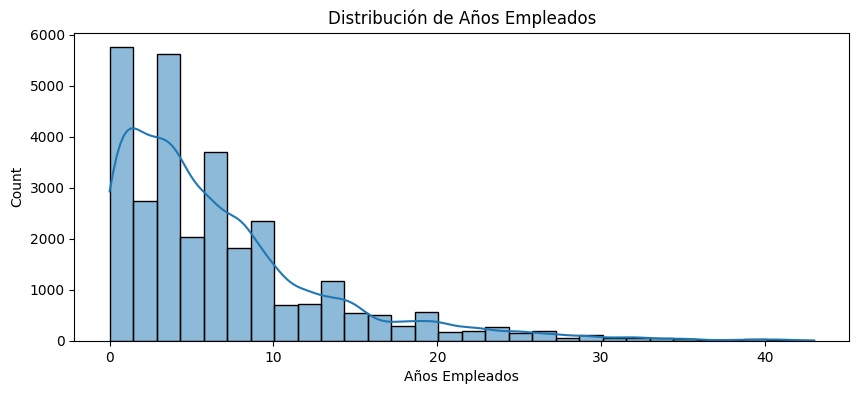

In [ ]:
# Revisamos YEARS_EMPLOYED
plt.figure(figsize=(10,4))
sns.histplot(Credit_Card_Approval['DAYS_EMPLOYED'], bins=30, kde=True)
plt.title("Distribución de Años Empleados")
plt.xlabel("Años Empleados")
plt.show()

#Observaciones:
# La mayoría de las personas tiene pocos años empleados (de 0 a ~10 años).
# Pico fuerte en 0 años empleados: Clientes desempleados

In [ ]:
Credit_Card_Approval['FLAG_EMPLOYED'] = Credit_Card_Approval['DAYS_EMPLOYED'] >= 1
Credit_Card_Approval['FLAG_EMPLOYED'] = (Credit_Card_Approval['DAYS_EMPLOYED'] >= 1).astype(int)
print(Credit_Card_Approval['FLAG_EMPLOYED'].value_counts())

FLAG_EMPLOYED
1    27434
0     8648
Name: count, dtype: int64


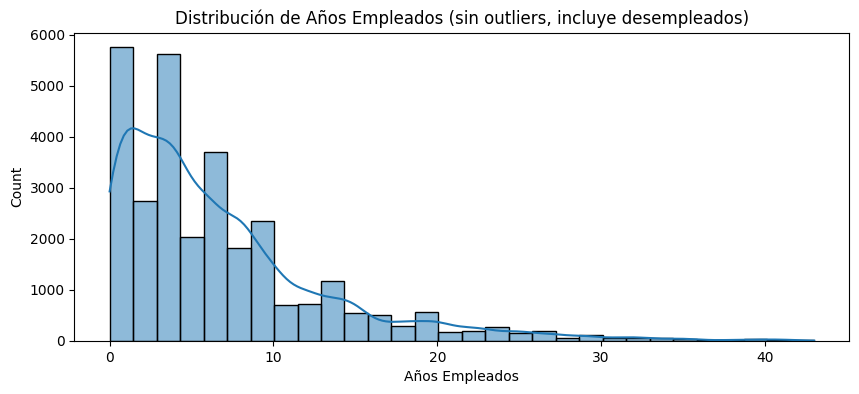

In [ ]:
plt.figure(figsize=(10, 4))
sns.histplot(Credit_Card_Approval['DAYS_EMPLOYED'], bins=30, kde=True)
plt.xlabel("Años Empleados")
plt.title("Distribución de Años Empleados (sin outliers, incluye desempleados)")
plt.show()

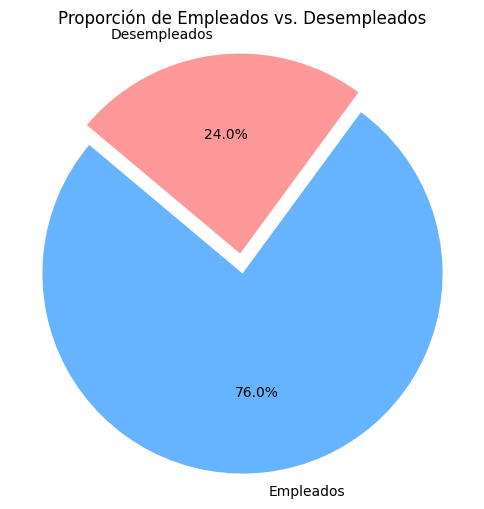

In [ ]:
#Grafico de pastel
# Contar valores
empleo_counts = Credit_Card_Approval['FLAG_EMPLOYED'].value_counts()
labels = ['Empleados', 'Desempleados']
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6, 6))
plt.pie(empleo_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0, 0.1))
plt.title('Proporción de Empleados vs. Desempleados')
plt.axis('equal')  # Para que sea un círculo
plt.show()

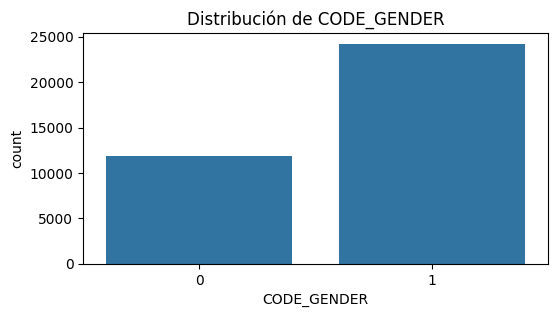

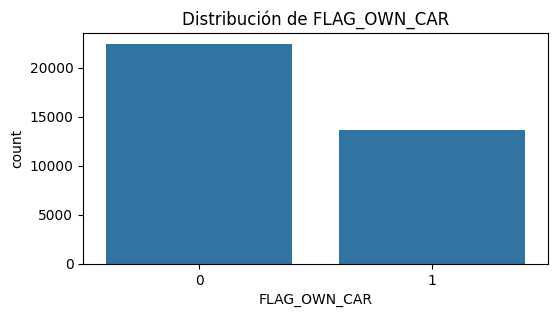

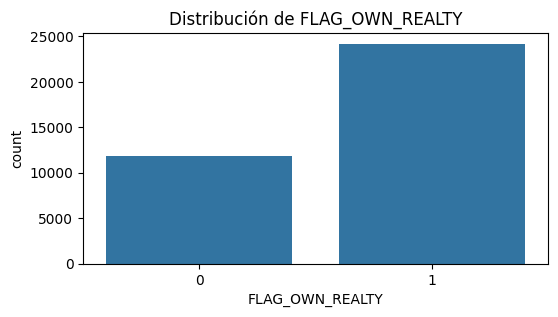

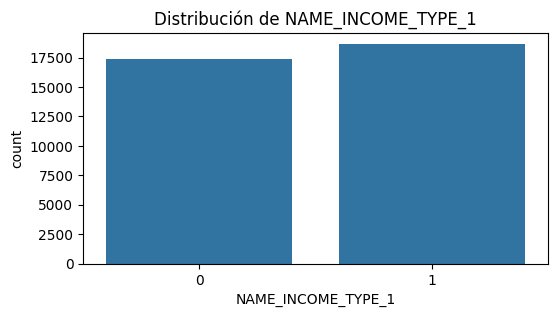

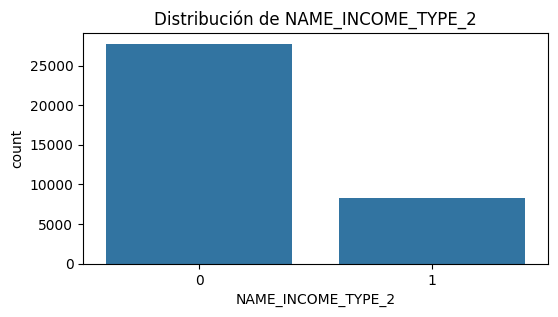

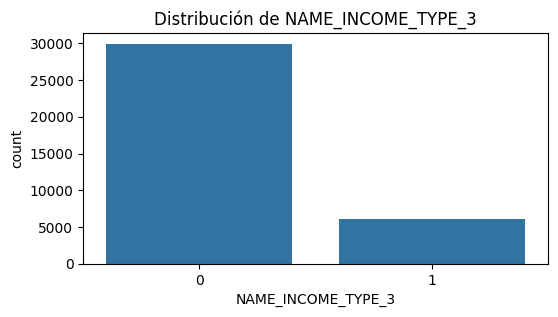

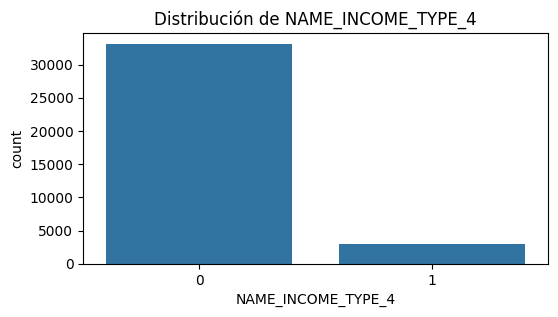

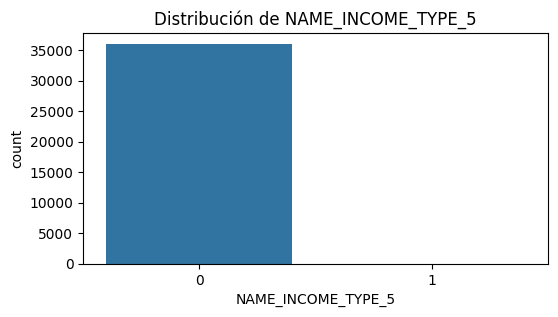

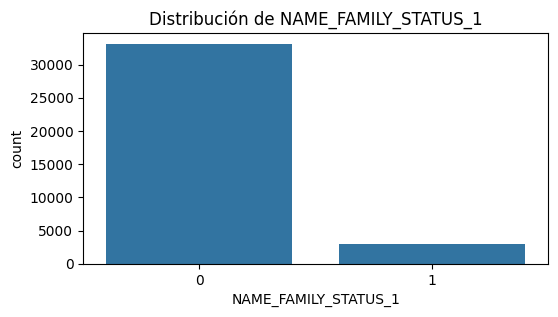

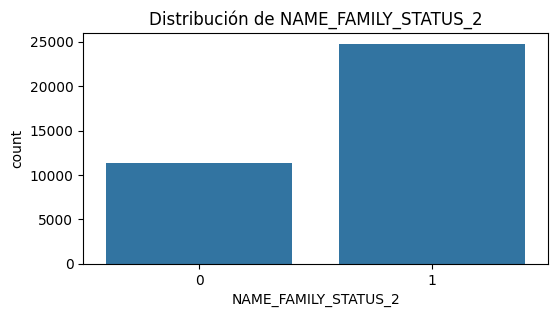

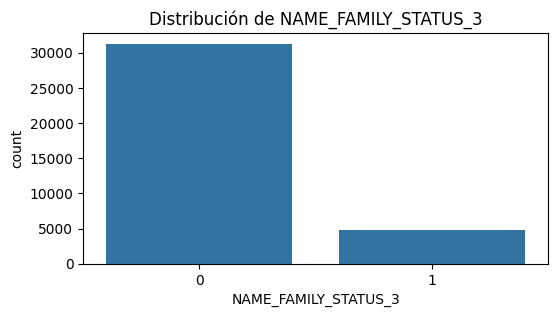

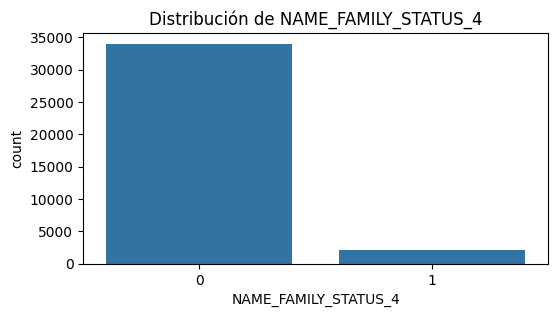

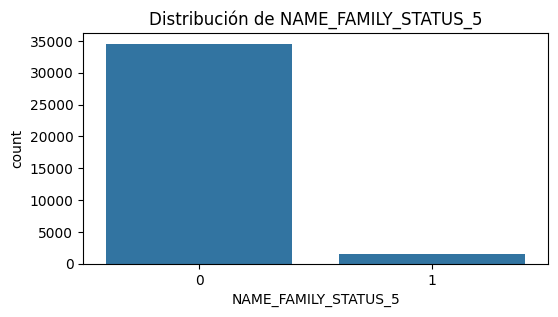

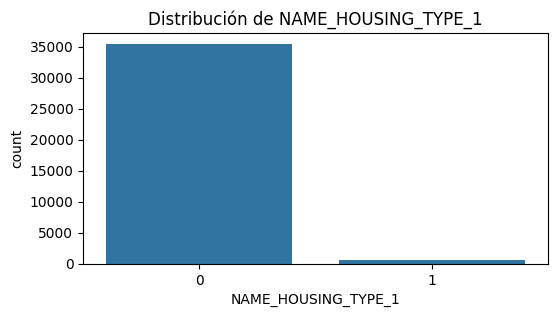

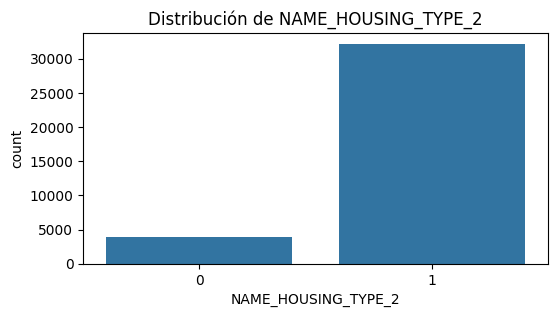

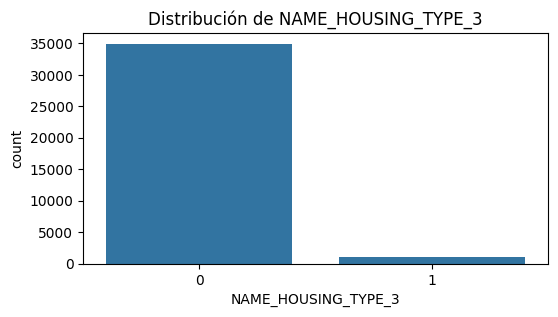

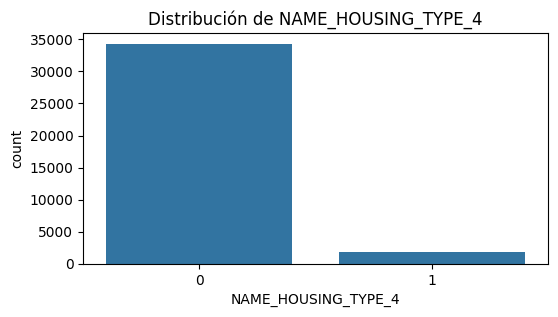

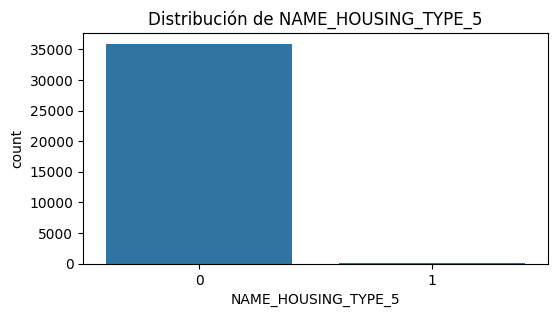

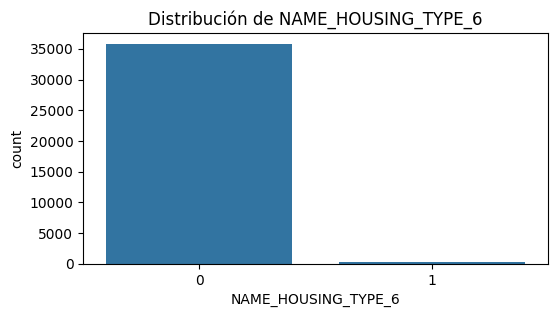

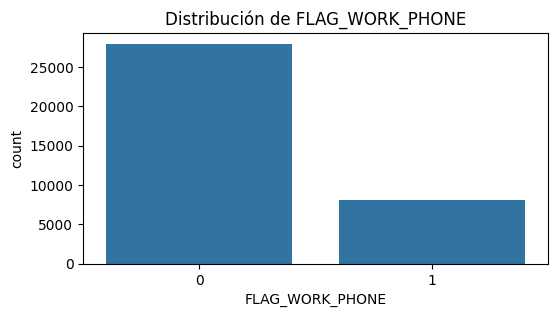

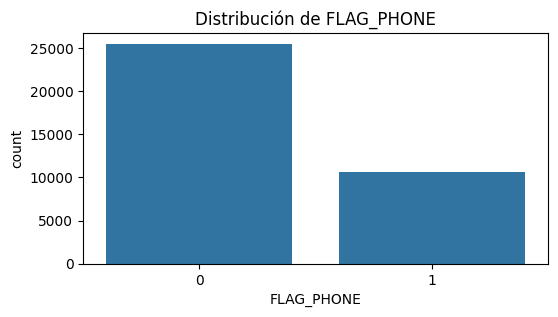

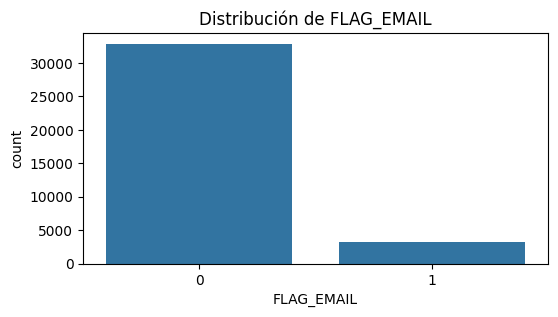

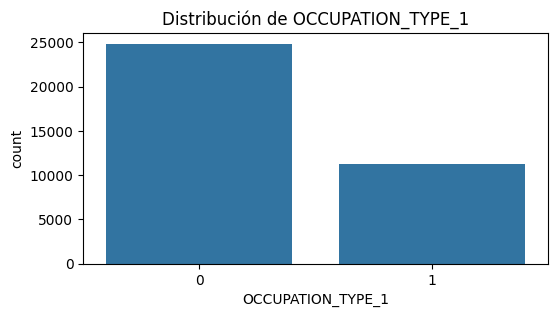

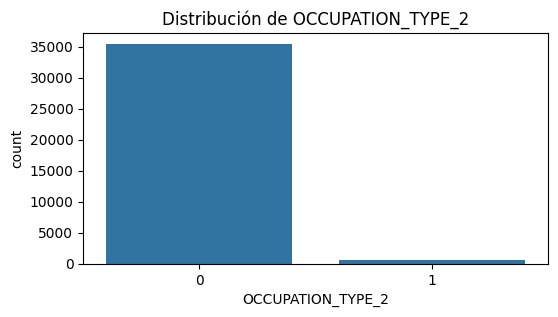

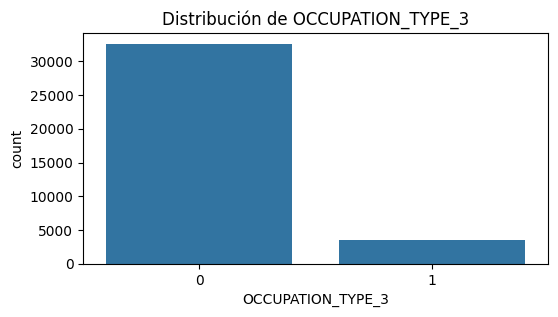

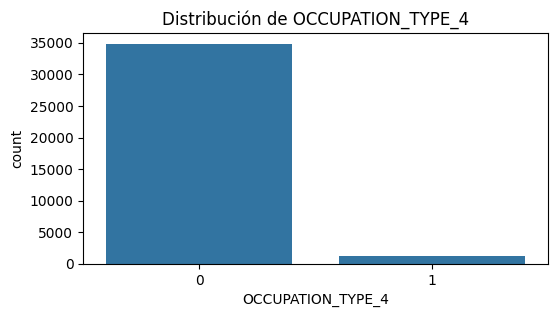

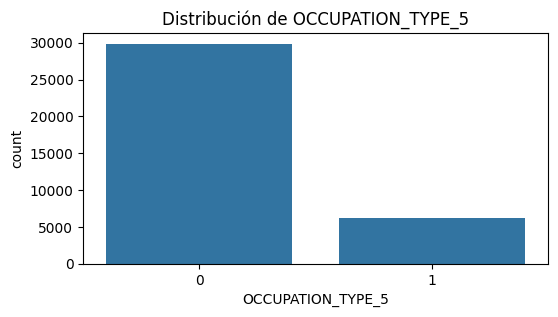

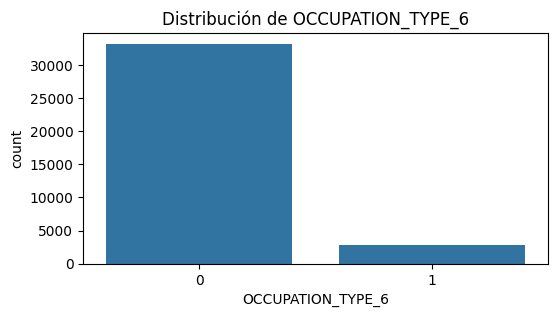

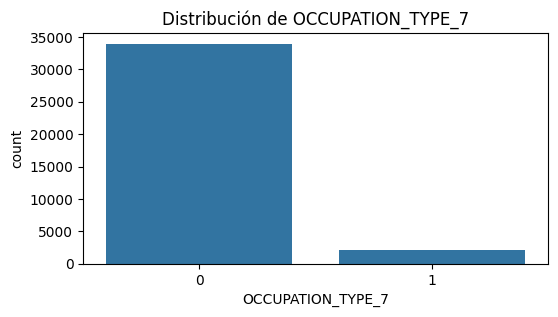

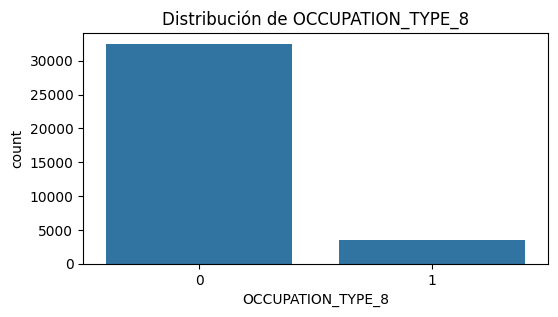

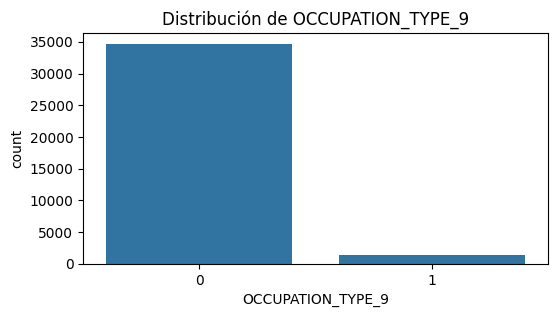

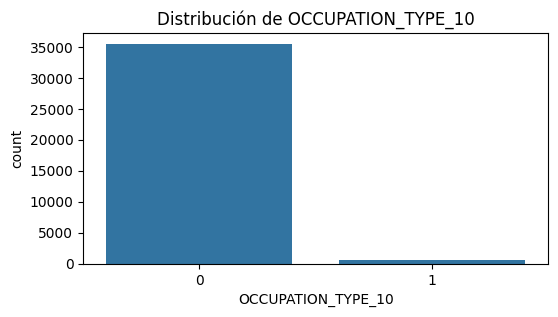

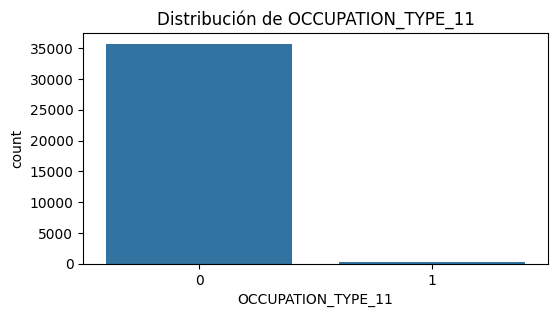

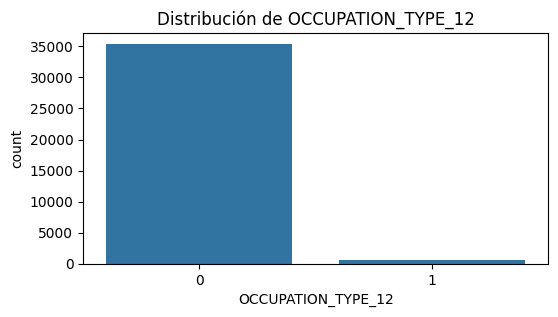

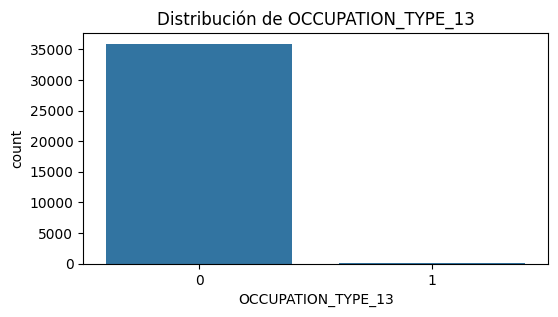

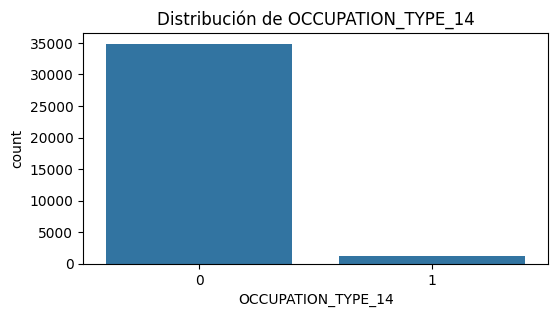

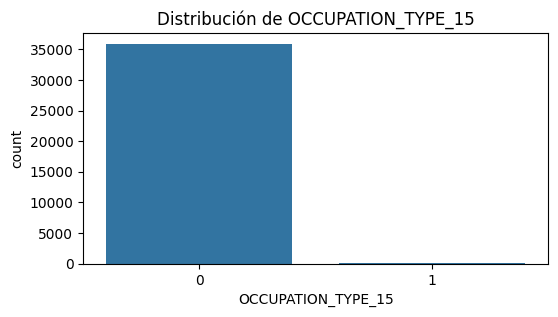

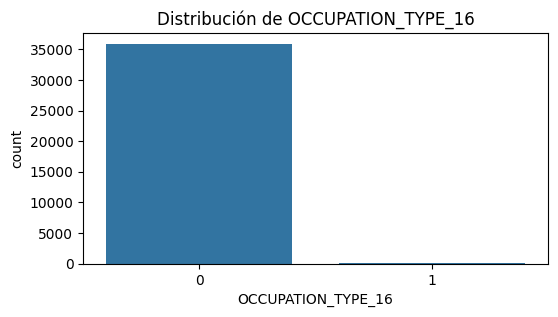

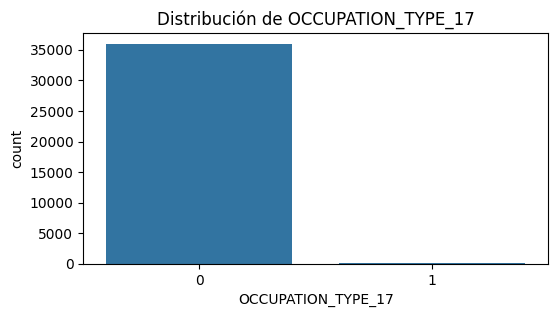

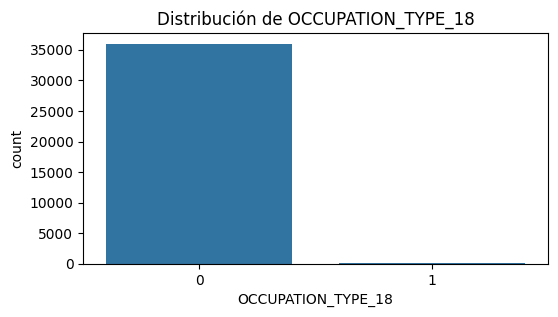

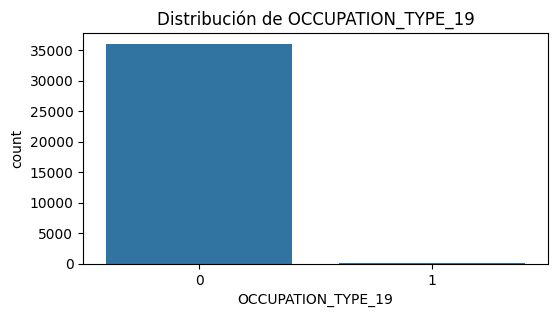

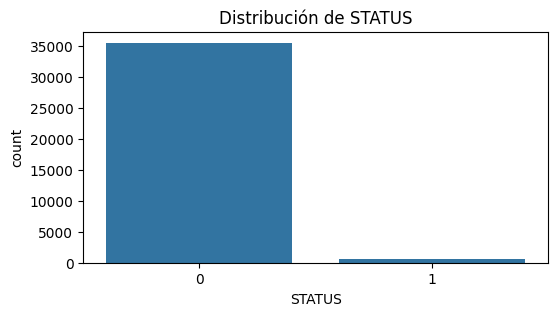

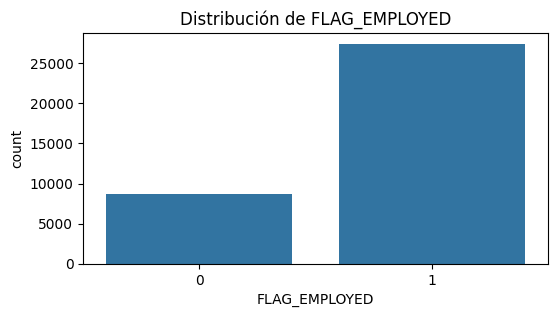

In [ ]:
# Gráfico barras para flags

flag_cols = [col for col in Credit_Card_Approval.columns if Credit_Card_Approval[col].nunique() == 2]

for col in flag_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=Credit_Card_Approval[col])
    plt.title(f"Distribución de {col}")
    plt.show()

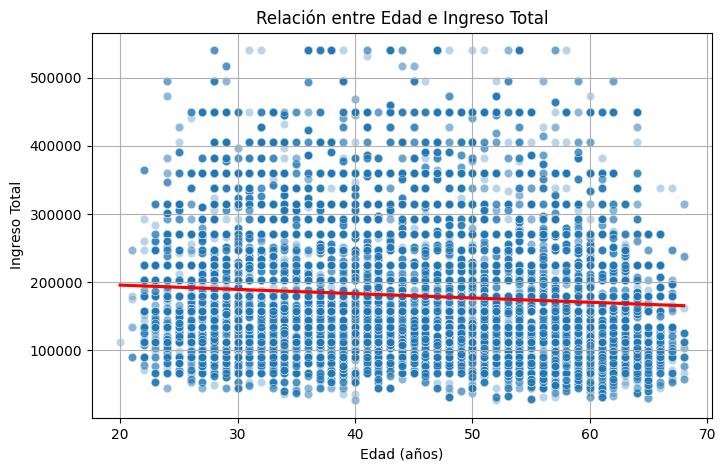

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='DAYS_BIRTH', y='AMT_INCOME_TOTAL', data=Credit_Card_Approval, alpha=0.3)
sns.regplot(x='DAYS_BIRTH', y='AMT_INCOME_TOTAL', data=Credit_Card_Approval, scatter=False, color='red')
plt.title('Relación entre Edad e Ingreso Total')
plt.xlabel('Edad (años)')
plt.ylabel('Ingreso Total')
plt.grid(True)
plt.show()

#Observaciones:

# 1- Edad y nivel de ingreso no están linealmente relacionados.
# lo que implica que:
# 2- Personas jóvenes pueden tener ingresos altos.
# 3- Personas mayores no necesariamente ganan más.
# 4- Se observa que para casi todas las edades (de 20 a 70 aprox.) hay un rango muy amplio de ingresos, desde bajos hasta muy altos.

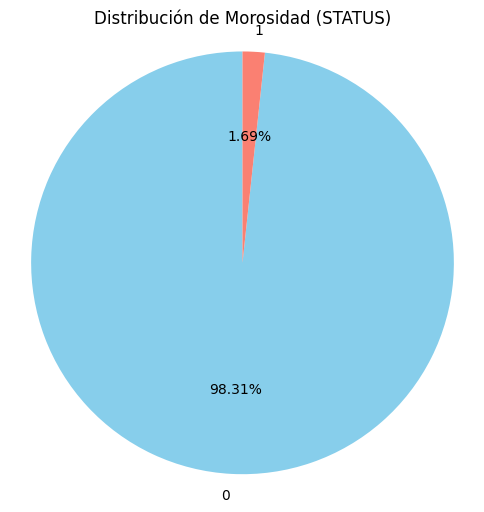

In [ ]:
#Gráfico de pastel

status_counts = Credit_Card_Approval['STATUS'].value_counts(normalize=True)

plt.figure(figsize=(6,6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.2f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.title('Distribución de Morosidad (STATUS)')
plt.axis('equal')  # Círculo perfecto
plt.show()